# Logistic regression from scratch

In this tutorial, we will implement logistic regression from scratch. 

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
%matplotlib inline

## Create a dataset

Let's apply logistic regression to a binary classification problem with only 10 observations and 2 features.

In [10]:
X, y = make_classification(
        n_samples=10, 
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=1, 
        n_clusters_per_class=1)
print(X)
print(y)

[[-0.64185521  0.78535215]
 [ 0.10972634  1.83671408]
 [-1.07362634  2.591487  ]
 [-1.38222372  0.85340843]
 [ 1.78689446  2.3841826 ]
 [ 0.94785273  3.53015683]
 [ 1.08876018  1.35925144]
 [ 0.42774158  3.54015499]
 [-0.88398194 -0.57876171]
 [-1.59347411  1.2168913 ]]
[1 0 1 1 0 0 0 0 1 1]


Text(0, 0.5, '$X_2$')

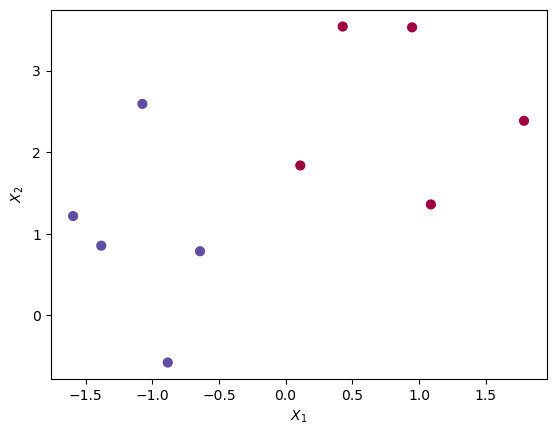

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

We have 10 observations $X$ with 2 features $\theta$ and we know their labels $y$. Can we predict the label of a new observation? 

## Logistic regression

Logistic regression models the probability that an observation belongs to a particular category. 
To generate these probabilities, logistic regression uses the **sigmoid** function. This function maps a real number to a values between 0 and 1.
\begin{equation} 
g(z) = \frac{1}{1+e^{-z}}
\end{equation}

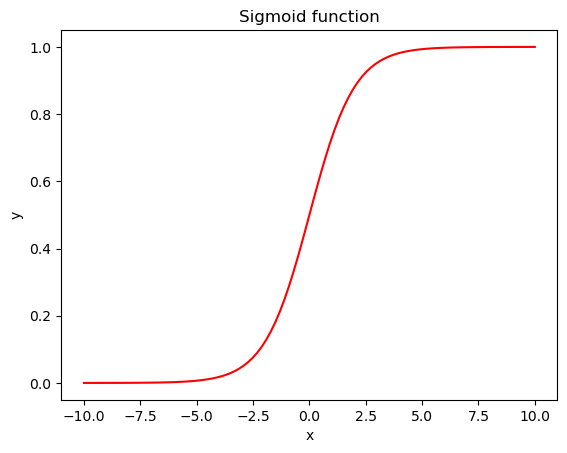

In [12]:
# Sigmoid function plot
X_a = np.linspace(-10, 10, 100)
Y_a = 1 / (1 + np.exp(-X_a))
plt.plot(X_a, Y_a, label="Sigmoid function", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sigmoid function")
plt.show()


We can then define our hypothesis as follows, $h(X) = g(X \theta)$
where 
- $\theta$ is the coefficient vector
- $X$ is the vector of all the observations (to which we added the intercept i.e. a column of ones)

$h(X)$ gives us the probability that our output is 1, which means
- if $ X \theta \geqslant 0 $, then $h(X) \geqslant 0.5$, then predict $y = 1$
- if $ X \theta < 0 $, then $h(X) < 0.5$, then predict $y = 0$

In [13]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calc_h(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

XX = add_intercept(X)
theta = np.zeros(XX.shape[1])
h = calc_h(XX, theta)

print(XX)
print(theta)
print(h)

[[ 1.         -0.64185521  0.78535215]
 [ 1.          0.10972634  1.83671408]
 [ 1.         -1.07362634  2.591487  ]
 [ 1.         -1.38222372  0.85340843]
 [ 1.          1.78689446  2.3841826 ]
 [ 1.          0.94785273  3.53015683]
 [ 1.          1.08876018  1.35925144]
 [ 1.          0.42774158  3.54015499]
 [ 1.         -0.88398194 -0.57876171]
 [ 1.         -1.59347411  1.2168913 ]]
[0. 0. 0.]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


# Loss function

The loss function of logistic regression is defined as follows,
\begin{equation} 
J(\theta) = \frac{1}{m}(-y \log(h) - (1 - y) \log(1 - h))
\end{equation}
where $m$ is the number of observations.

This loss function penalises mis-classified observations. For example,
- if $y=0$ and $h\rightarrow 1$, then $J(\theta)\rightarrow ∞$  (strong penalty)
- if $y=0$ and $h\rightarrow 0$, then $J(\theta)\rightarrow 0$  (small penalty)
- if $y=1$ and $h\rightarrow 0$, then $J(\theta)\rightarrow ∞$  (strong penalty)
- if $y=1$ and $h\rightarrow 1$, then $J(\theta)\rightarrow 0$  (small penalty)

In [15]:
import numpy as np

print(h.shape, y.shape)
def cost_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

cost = cost_function(h, y)

(10,) (10,)


## Gradient descent

In order to get an accurate prediction, we need to minimise the loss function $J(\theta)$. This is done by 
fitting the coefficients $\theta$. This is done by computing the derivative of the loss function with respect to each coefficient $\theta$. This gradient is an indication of how much the loss would vary if we change the coefficient. This is known as the method of the *Gradient Descent*.
\begin{equation} 
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
\end{equation}
where $\alpha$ is the learning rate.

We can show that
\begin{equation} 
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} X^T (h - y) 
\end{equation}

In [16]:
m = y.size
alpha = 0.01

gradient = np.dot(XX.T, (h - y)) / m
theta -= alpha * gradient

print(gradient)
print(theta)

[0.         0.49680683 0.38910414]
[ 0.         -0.00496807 -0.00389104]


## Training the model

We need to repeat these steps in order to fit the coefficients.

In [17]:
num_iter = 100000
cost_list = []

for i in range(num_iter):
    h = calc_h(XX, theta)
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    cost_list.append(cost)
    
    gradient = np.dot(XX.T, (h - y)) / m
    theta -= alpha * gradient


    if i % 10000 == 0:
        print('Cost: {}'.format(cost))

print('Adjusted coefficient: {}'.format(theta))

Cost: 0.6891798102118079
Cost: 0.029018963792119053
Cost: 0.01686836306295252
Cost: 0.011987504873922989
Cost: 0.00931561356220478
Cost: 0.007622970166495642
Cost: 0.006452771930733887
Cost: 0.005594848380972046
Cost: 0.00493866575865457
Cost: 0.004420439107974004
Adjusted coefficient: [ 0.66203066 -8.49512412 -1.97751376]


## Plot the loss function

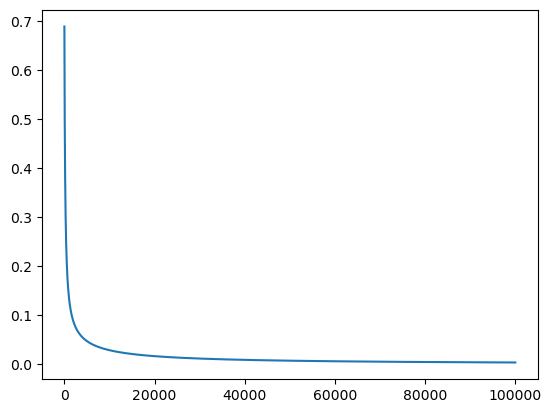

In [18]:
plt.plot(range(num_iter), cost_list)

The loss fonction is decreasing, which is a good sign.

## Making predictions

We can then calculate the prediction probabilities output by the sigmoid function for each observation.

In [19]:
preds_prob = calc_h(XX, theta)
print(preds_prob)

[9.89662906e-01 1.97968770e-02 9.90602955e-01 9.99977826e-01
 4.43999108e-09 5.73774026e-07 1.26852162e-05 4.66685994e-05
 9.99910042e-01 9.99992438e-01]


As we have seen earlier, the decision boundary of the sigmoid function is defined at 0.5. We can round the probabilities to assign the predicted class to each observation.

In [20]:
preds = preds_prob.round()
print(preds)

[1. 0. 1. 1. 0. 0. 0. 0. 1. 1.]


Finally, we can calculate the training accuracy score.

In [21]:
score_numpy = (preds == y).mean()
print('Score Numpy: {}'.format(score_numpy))

Score Numpy: 1.0


This training score is not a very good indicator of the accuracy of our model since we trained it using the same labels $y$. Let's see how the model perform on an unseen observation.

In [22]:
new_x = np.array([1, -0.8, 0.8])   # new observation (-0.8, 0.8)  with an intercept of 1
print(new_x)
preds_prob_new_x = calc_h(new_x, theta).round()
print("predicted output for the new observation: ", preds_prob_new_x)

[ 1.  -0.8  0.8]
predicted output for the new observation:  1.0


## Plot the decision boundary

(-0.5787617147305777, 3.540154992249955)

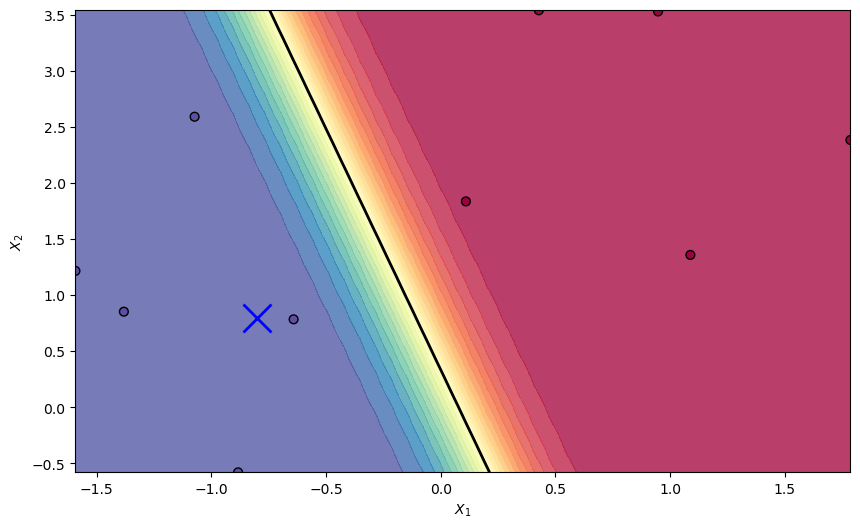

In [23]:
plt.figure(figsize=(10, 6))

# define 2d grid
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

# make predictions on the grid
grid = add_intercept(grid)
probs = calc_h(grid, theta)
probs = probs.reshape(xx1.shape)

# plot contours
ax = plt.gca()
plt.contourf(xx1, xx2, probs, levels=25, cmap=plt.cm.Spectral, alpha=0.8)
plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black') # decision boundary at 0.5
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.plot(-0.8, 0.8, 'bx', markersize=20, markeredgewidth=2)  # new observation correctly classified as 1 (blue)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
ax.set_xlim([x1_min, x1_max])
ax.set_ylim([x2_min, x2_max])

## Sklearn implementation

Of course, logistic regression is already implemented in Scikit-learn.

In [24]:
model = LogisticRegression(C=1e20, solver='lbfgs')
model.fit(X, y)
preds = model.predict(X)

score_sklearn = (preds == y).mean()
print('Score Sklearn: {}'.format(score_sklearn))
print(model.intercept_, model.coef_)

Score Sklearn: 1.0
[0.27561212] [[-14.70501451  -3.00497196]]
